<a href="https://colab.research.google.com/github/sapan-ostic/openvla/blob/main/OpenVLA_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving OpenVLA_eval_image.png to OpenVLA_eval_image.png


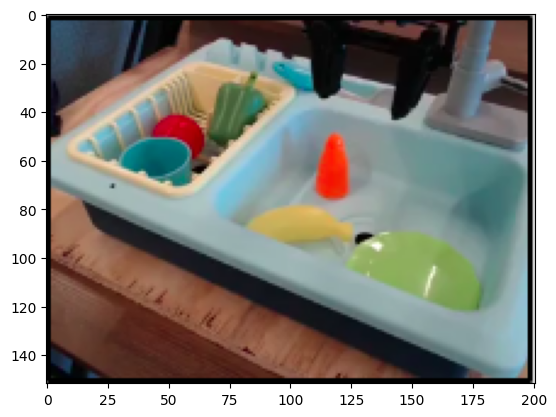

In [2]:
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# Assuming you uploaded an image named 'my_image.jpg'
image_name = list(uploaded.keys())[0]
img = Image.open(BytesIO(uploaded[image_name]))

plt.imshow(img)
plt.show()


In [3]:
# Install minimal dependencies (`torch`, `transformers`, `timm`, `tokenizers`, ...)
!pip install -r https://raw.githubusercontent.com/openvla/openvla/main/requirements-min.txt

# Install build-essential for compilation tools
!apt-get update && apt-get install -y build-essential

# The previous attempt to install flash_attn failed and it's not compatible with the current GPU.
# Therefore, we remove the installation command.
# !pip install flash_attn --no-build-isolation

from transformers import AutoModelForVision2Seq, AutoProcessor
from PIL import Image

import torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 45.0 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.3
    Uninstalling transformers-4.57.3:
      Successfully uninstalled transformers-4.57.3
  Attempting uninstall: timm
    Found existing installation: timm 1.0.22
    Uninstalling timm-1.0.22:
      Successfully uninstalled timm-1.0.22
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

In [4]:
import torch

# Load Processor & VLA
processor = AutoProcessor.from_pretrained("openvla/openvla-7b", trust_remote_code=True)
vla = AutoModelForVision2Seq.from_pretrained(
    "openvla/openvla-7b",
    # attn_implementation="flash_attention_2",  # FlashAttention is not supported on this GPU
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    trust_remote_code=True
).to("cuda:0")

# Grab image input & format prompt

# image: img # Load image from file
instruction = "put the carrot on the plate"
prompt = "In: What action should the robot take to {instruction}?\nOut:"

# Predict Action (7-DoF; un-normalize for BridgeData V2)
inputs = processor(prompt, img).to("cuda:0", dtype=torch.bfloat16)
action = vla.predict_action(**inputs, unnorm_key="bridge_orig", do_sample=False)

print(f"Instruction: {instruction}")
print(f"Predicted Action (7-DoF): {action}")
# Execute...
# robot.act(action, ...)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/130 [00:00<?, ?B/s]

processing_prismatic.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openvla/openvla-7b:
- processing_prismatic.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_prismatic.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openvla/openvla-7b:
- configuration_prismatic.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_prismatic.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openvla/openvla-7b:
- modeling_prismatic.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/6.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/6.97G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.16G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

Instruction: put the carrot on the plate
Predicted Action (7-DoF): [-2.08787322e-04 -1.00362692e-04 -7.25652626e-03  4.96987302e-03
  1.66358845e-02 -6.67113405e-05  9.96078431e-01]


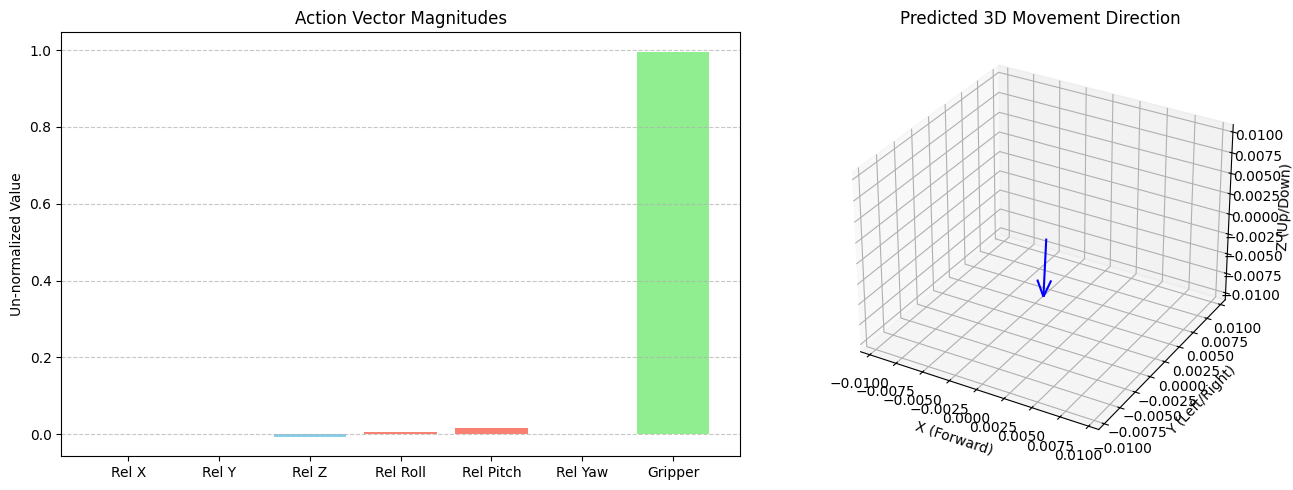

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Your output data
action = np.array([-2.08787322e-04, -1.00362692e-04, -7.25652626e-03,
                   4.96987302e-03, 1.66358845e-02, -6.67113405e-05, 9.96078431e-01])

labels = ['Rel X', 'Rel Y', 'Rel Z', 'Rel Roll', 'Rel Pitch', 'Rel Yaw', 'Gripper']

fig = plt.figure(figsize=(14, 5))

# Plot 1: Bar chart of all 7 dimensions
ax1 = fig.add_subplot(1, 2, 1)
colors = ['skyblue'] * 3 + ['salmon'] * 3 + ['lightgreen']
ax1.bar(labels, action, color=colors)
ax1.set_title('Action Vector Magnitudes')
ax1.set_ylabel('Un-normalized Value')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: 3D Visualization of the Translation Vector (X, Y, Z)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Plotting the vector from origin (0,0,0) to (action[0], action[1], action[2])
ax2.quiver(0, 0, 0, action[0], action[1], action[2],
           color='blue', length=1.0, arrow_length_ratio=0.3)

# Setting limits for visibility (adjust if action values are larger)
limit = max(abs(action[:3])) * 1.5 if max(abs(action[:3])) > 0 else 0.01
ax2.set_xlim([-limit, limit])
ax2.set_ylim([-limit, limit])
ax2.set_zlim([-limit, limit])

ax2.set_xlabel('X (Forward)')
ax2.set_ylabel('Y (Left/Right)')
ax2.set_zlabel('Z (Up/Down)')
ax2.set_title('Predicted 3D Movement Direction')

plt.tight_layout()
plt.show()